In [2]:
!pip install umap

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement umap (from versions: none)

[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python3 -m pip install --upgrade pip
ERROR: No matching distribution found for umap


In [63]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
import GPUtil

# import umap
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import random
import warnings
warnings.filterwarnings(action='ignore')

# <font color="yellow">Clustering of salt and cold samples</font>

## <font color="orange">Load TPM data</font>

In [64]:
df_salt_TPM=pd.read_csv("Data/TPM_Salt_Stress.csv")
df_cold_TPM=pd.read_csv("Data/TPM_Cold_Stress.csv")
df_heat_TPM=pd.read_csv("Data/TPM_Heat_Stress.csv")
df_drought_TPM=pd.read_csv("Data/TPM_Drought_Stress.csv")
df_salt_TPM=df_salt_TPM.set_index("Gene_ID")
df_cold_TPM=df_cold_TPM.set_index("Gene_ID")
df_heat_TPM=df_heat_TPM.set_index("Gene_ID")
df_drought_TPM=df_drought_TPM.set_index("Gene_ID")

In [65]:
df_salt_TPM

,DRR244343,DRR244344,DRR244345,DRR244346,DRR244347,DRR244349,DRR244350,DRR244351,DRR244352,DRR244353,...,SRR28239396,SRR28239397,SRR28239398,SRR28239399,SRR28239400,SRR28239401,SRR28239402,SRR28239403,SRR28239404,SRR28239405
Gene_ID,,,,,,,,,,,,,,,,,,,,,
AT1G01010.1,6,8,3,12,9,6,5,4,7,6,...,33,33,28,35,23,20,24,11,15,15
AT1G01020.1,5,3,2,3,2,2,3,5,4,2,...,18,12,11,13,21,19,10,25,22,24
AT1G01030.1,3,6,2,5,3,4,7,4,4,4,...,1,1,1,1,0,0,1,0,0,1
AT1G01040.2,9,6,11,8,7,7,5,9,6,9,...,11,8,6,6,14,12,5,7,11,8
AT1G01050.1,39,39,43,75,44,36,23,30,43,93,...,155,145,128,143,161,145,115,156,165,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATMG01350.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ATMG01360.1,2,2,0,1,0,0,0,2,1,2,...,0,0,1,0,0,0,2,0,1,0
ATMG01370.1,0,1,0,0,0,0,0,0,0,0,...,4,1,4,2,3,1,6,5,5,3


In [66]:
df_cold_TPM

,DRR228459,DRR228460,DRR228461,DRR228462,DRR228463,DRR228465,DRR228466,DRR228467,DRR228468,DRR228469,...,SRR11095465,SRR11095466,SRR11095467,SRR11095468,SRR11095471,SRR11095472,SRR11144422,SRR15881485,SRR15881486,SRR15881487
Gene_ID,,,,,,,,,,,,,,,,,,,,,
AT1G01010.1,6,3,5,4,6,3,4,3,6,7,...,1,1,0,1,0,1,4,10,9,11
AT1G01020.1,18,15,11,19,15,15,15,13,17,13,...,3,4,4,6,3,4,19,16,13,19
AT1G01030.1,3,1,1,3,3,4,1,2,3,3,...,2,3,2,2,1,1,3,5,6,5
AT1G01040.2,6,6,5,8,9,8,9,8,8,10,...,3,4,2,3,2,2,9,8,8,14
AT1G01050.1,179,116,399,88,87,84,63,84,72,76,...,19,18,14,26,27,25,90,67,64,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATMG01350.1,0,0,0,0,0,0,0,0,0,0,...,41,14,16,26,12,18,1,11,8,10
ATMG01360.1,0,1,2,1,3,1,1,1,1,2,...,449,468,426,459,374,489,4,113,124,105
ATMG01370.1,2,1,1,2,1,2,1,3,2,6,...,12,1,2,8,1,2,2,12,12,13


In [67]:
df_heat_TPM

,DRR255721,DRR255722,DRR255723,DRR255724,DRR255725,DRR255730,DRR255731,SRR1020621,SRR1020622,SRR1020623,...,SRR24487516,SRR24487517,SRR24487518,SRR24487519,SRR24487520,SRR24487521,SRR24487522,SRR24487523,SRR24487524,SRR24487525
Gene_ID,,,,,,,,,,,,,,,,,,,,,
AT1G01010.1,8,7,5,5,7,5,5,6,4,7,...,3,4,3,3,5,4,5,3,4,4
AT1G01020.1,18,16,35,32,34,30,27,14,11,18,...,2,4,4,3,4,6,4,4,4,4
AT1G01030.1,2,1,0,1,1,0,1,3,0,2,...,1,1,1,1,7,5,5,6,4,3
AT1G01040.2,8,6,18,27,27,15,30,7,4,7,...,1,2,1,1,3,3,3,4,3,3
AT1G01050.1,100,106,86,86,86,80,80,95,80,90,...,54,76,48,56,84,72,68,81,67,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATMG01350.1,0,1,27,31,21,27,32,0,2,0,...,5,12,5,3,0,0,0,0,0,0
ATMG01360.1,5,6,460,443,471,404,498,1,10,1,...,14,28,12,12,0,0,0,0,0,0
ATMG01370.1,3,6,331,409,370,292,329,6,47,8,...,28,69,29,25,3,1,2,2,1,0


In [68]:
df_drought_TPM

,SRR10540998,SRR10540999,SRR10541000,SRR10541001,SRR10541006,SRR10541007,SRR10690462,SRR10690463,SRR10690464,SRR10690465,...,SRR23615403,SRR23615404,SRR23615405,SRR23615406,SRR23615410,SRR26161209,SRR26161210,SRR26161211,SRR26161212,SRR26161213
Gene_ID,,,,,,,,,,,,,,,,,,,,,
AT1G01010.1,0,3,2,3,4,2,6,5,10,7,...,4,2,2,2,2,5,4,5,6,5
AT1G01020.1,19,15,15,15,16,20,10,9,14,10,...,12,15,18,11,14,7,5,6,4,3
AT1G01030.1,0,0,0,0,0,0,0,0,0,0,...,3,2,1,0,1,2,2,3,5,3
AT1G01040.2,0,3,1,2,4,1,16,14,19,13,...,11,9,11,9,11,4,3,4,4,4
AT1G01050.1,83,67,73,67,112,107,100,102,105,112,...,78,87,92,79,80,105,98,97,96,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATMG01350.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,1
ATMG01360.1,4,4,3,2,5,5,1,1,0,0,...,0,0,0,0,0,3,3,4,3,4
ATMG01370.1,65,33,32,12,59,63,2,2,3,2,...,0,0,0,0,1,8,9,5,6,6


## <font color="orange">Load sample IDs</font>

In [69]:
def txt_to_list(file_path):
    file_open=open(file_path,'r')
    file_lines=file_open.readlines()
    out_list=[f.strip() for f in file_lines if f !=""]
    return out_list
    

In [70]:

salt_control_list=txt_to_list("Data/id_control_salt.txt")
salt_sample_list=txt_to_list("Data/id_samples_salt.txt")
cold_control_list=txt_to_list("Data/id_control_cold.txt")
cold_sample_list=txt_to_list("Data/id_samples_cold.txt")

heat_control_list=txt_to_list("Data/id_control_heat.txt")
heat_sample_list=txt_to_list("Data/id_samples_heat.txt")
drought_control_list=txt_to_list("Data/id_control_drought.txt")
drought_sample_list=txt_to_list("Data/id_samples_drought.txt")

random.seed(111)

# Random select of 50 control samples from each stress____________
# cold_control_list=random.sample(cold_control_list, 50)
# salt_control_list=random.sample(salt_control_list, 50)
# heat_control_list=random.sample(heat_control_list, 50)
# drought_control_list=random.sample(drought_control_list, 50)


In [71]:
salt_sample_TPM=df_salt_TPM[salt_sample_list]
salt_control_TPM=df_salt_TPM[salt_control_list]

In [72]:
salt_sample_TPM

,SRR19139695,SRR19139696,SRR19139697,SRR19139698,SRR19139699,SRR19139700,SRR19139701,SRR19139702,SRR19139703,SRR6781801,...,DRR244356,DRR244358,DRR244364,DRR244366,SRR24061048,SRR24061049,SRR24061050,SRR24061053,SRR24061054,SRR24061055
Gene_ID,,,,,,,,,,,,,,,,,,,,,
AT1G01010.1,7,5,6,10,12,12,8,9,9,17,...,10,4,9,5,7,6,9,5,4,4
AT1G01020.1,10,8,9,17,18,15,9,14,12,13,...,1,2,3,1,1,1,0,0,0,0
AT1G01030.1,6,5,4,7,7,6,1,2,2,0,...,4,6,2,7,5,4,3,3,3,4
AT1G01040.2,4,3,4,6,7,6,3,5,5,13,...,4,5,6,5,7,6,11,14,11,6
AT1G01050.1,78,60,77,81,74,78,66,63,67,120,...,25,29,22,27,78,54,61,84,92,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATMG01350.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,44,40,46,22,27,23
ATMG01360.1,0,0,0,0,0,0,0,0,0,2,...,1,0,1,0,303,239,266,284,308,323
ATMG01370.1,0,0,0,0,0,1,0,0,1,10,...,0,0,0,0,1,3,1,3,1,3


In [73]:
salt_control_TPM

,SRR19139704,SRR19139705,SRR19139706,SRR19139707,SRR19139708,SRR19139709,SRR19139710,SRR19139711,SRR19139712,SRR1915004,...,DRR244347,DRR244349,DRR244355,DRR244357,DRR244365,SRR24061051,SRR24061052,SRR24061056,SRR24061057,SRR24061058
Gene_ID,,,,,,,,,,,,,,,,,,,,,
AT1G01010.1,4,3,3,4,4,3,3,2,3,6,...,9,6,7,5,4,3,4,5,3,5
AT1G01020.1,13,11,11,14,12,9,10,13,9,24,...,2,2,2,1,1,1,0,1,1,0
AT1G01030.1,2,3,3,3,2,3,1,1,1,3,...,3,4,3,4,3,2,4,7,5,7
AT1G01040.2,6,5,4,7,6,5,5,4,4,6,...,7,7,5,5,6,11,13,5,4,5
AT1G01050.1,76,80,85,80,79,71,70,65,68,85,...,44,36,44,22,31,65,71,94,85,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATMG01350.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,36,57,28,24,33
ATMG01360.1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,256,304,287,305,288
ATMG01370.1,1,1,0,1,2,0,2,0,1,1,...,0,0,0,0,0,2,4,4,6,3


In [74]:
cold_control_TPM=df_cold_TPM[cold_control_list]
cold_sample_TPM=df_cold_TPM[cold_sample_list]

In [75]:
cold_control_TPM

,SRR11095465,SRR11095466,SRR11095467,SRR11095468,SRR11095471,SRR11095472,SRR22250991,SRR22250994,SRR22250995,SRR7600382,...,ERR2592723,ERR2592724,ERR2592725,SRR8667484,SRR8667485,SRR8667486,SRR8667494,SRR8667495,SRR8667496,SRR8667497
Gene_ID,,,,,,,,,,,,,,,,,,,,,
AT1G01010.1,1,1,0,1,0,1,1,1,2,3,...,1,1,1,6,8,7,9,9,10,8
AT1G01020.1,3,4,4,6,3,4,11,10,21,20,...,7,5,6,19,18,14,16,17,16,15
AT1G01030.1,2,3,2,2,1,1,1,0,1,0,...,0,3,4,3,2,2,1,1,1,1
AT1G01040.2,3,4,2,3,2,2,5,5,7,8,...,5,6,6,12,11,11,11,11,11,11
AT1G01050.1,19,18,14,26,27,25,73,79,73,158,...,67,98,107,78,92,85,96,100,93,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATMG01350.1,41,14,16,26,12,18,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
ATMG01360.1,449,468,426,459,374,489,0,0,0,1,...,1,1,1,1,1,1,0,5,5,0
ATMG01370.1,12,1,2,8,1,2,0,3,4,8,...,1,2,1,1,0,0,1,2,1,0


In [76]:
cold_sample_TPM

,SRR10539030,SRR10539031,SRR10539032,SRR11095461,SRR11095462,SRR11095463,SRR11095464,SRR11095469,SRR11095470,SRR22250984,...,SRR8667492,SRR8667493,SRR8667498,SRR8667499,SRR8667500,SRR8667501,SRR8667502,SRR8667503,SRR8667504,SRR8667505
Gene_ID,,,,,,,,,,,,,,,,,,,,,
AT1G01010.1,1,0,0,0,3,1,1,1,0,3,...,12,12,10,10,9,10,12,15,17,17
AT1G01020.1,3,2,2,4,4,5,4,3,3,8,...,14,13,15,13,15,12,11,20,13,11
AT1G01030.1,2,0,1,1,2,0,1,2,2,0,...,2,1,1,1,1,0,0,1,1,1
AT1G01040.2,2,2,1,2,3,3,3,2,2,4,...,16,16,11,11,12,12,13,9,13,15
AT1G01050.1,28,13,24,21,37,44,26,20,22,121,...,137,133,116,113,104,104,106,158,136,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATMG01350.1,16,16,14,18,18,14,15,12,29,0,...,0,0,0,0,0,0,0,0,0,0
ATMG01360.1,493,496,528,421,443,383,412,425,421,0,...,0,1,1,2,2,2,1,1,2,2
ATMG01370.1,2,1,1,3,4,1,2,0,2,0,...,0,1,1,1,0,0,0,0,1,1


In [77]:
heat_control_TPM=df_heat_TPM[heat_control_list]
heat_sample_TPM=df_heat_TPM[heat_sample_list]

In [78]:
heat_control_TPM

,DRR149035,DRR149036,DRR149041,DRR149042,DRR149047,DRR149048,ERR1913326,ERR1913327,ERR1913330,ERR1913331,...,SRR7774140,SRR7774141,SRR7774153,SRR9281753,SRR9281754,SRR9281761,SRR9281762,SRR9696658,SRR9696662,SRR9696666
Gene_ID,,,,,,,,,,,,,,,,,,,,,
AT1G01010.1,6,5,5,6,5,5,26,24,25,26,...,6,6,8,0,0,2,2,1,1,1
AT1G01020.1,15,14,16,19,18,16,25,24,25,21,...,25,21,34,10,9,9,11,12,14,13
AT1G01030.1,2,2,1,2,3,2,3,2,2,2,...,3,4,5,0,0,0,0,0,0,0
AT1G01040.2,8,8,10,11,10,10,36,35,40,41,...,9,6,8,2,2,7,7,5,8,5
AT1G01050.1,70,70,68,72,71,77,76,91,72,64,...,131,146,126,66,68,48,51,78,66,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATMG01350.1,0,0,0,0,0,0,4,4,5,5,...,0,0,0,0,1,0,0,0,0,0
ATMG01360.1,1,0,0,0,0,0,56,66,85,87,...,0,0,1,3,3,2,1,0,1,0
ATMG01370.1,2,2,2,0,1,2,80,120,53,30,...,0,0,1,15,13,4,8,3,4,4


In [79]:
heat_sample_TPM

,DRR149039,DRR149040,DRR149045,DRR149046,DRR149051,DRR149052,ERR1913324,ERR1913325,ERR1913328,ERR1913329,...,SRR9281760,SRR9281763,SRR9281764,SRR9281765,SRR9281766,SRR9281767,SRR9281768,SRR9696660,SRR9696664,SRR9696668
Gene_ID,,,,,,,,,,,,,,,,,,,,,
AT1G01010.1,2,3,2,2,4,4,5,5,4,5,...,0,1,2,2,1,1,1,4,2,1
AT1G01020.1,37,32,27,31,36,38,13,15,14,12,...,4,3,7,7,7,4,5,29,18,17
AT1G01030.1,1,1,1,1,1,1,3,2,3,2,...,0,0,0,0,0,0,0,3,0,1
AT1G01040.2,9,10,8,9,11,11,9,9,9,8,...,1,1,2,2,1,1,1,11,10,8
AT1G01050.1,76,73,55,64,77,76,91,86,87,78,...,50,48,51,43,43,58,45,57,53,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATMG01350.1,1,2,2,3,4,3,0,0,0,0,...,7,5,4,4,2,5,3,4,2,1
ATMG01360.1,12,13,16,18,19,18,0,1,0,0,...,43,36,37,31,28,43,31,49,37,23
ATMG01370.1,13,6,7,7,12,11,0,0,0,0,...,29,30,20,38,25,27,23,37,16,10


In [80]:
drought_control_TPM=df_drought_TPM[drought_control_list]
drought_sample_TPM=df_drought_TPM[drought_sample_list]

In [81]:
drought_control_TPM

,SRR17036054,SRR17036061,SRR17036068,SRR17036069,SRR17036070,SRR17036071,SRR12687370,SRR12687374,SRR12687375,SRR12687376,...,SRR2989698,SRR2989709,SRR2989710,SRR2989711,SRR2989712,SRR9936816,DRR118343,DRR118344,DRR149035,DRR149036
Gene_ID,,,,,,,,,,,,,,,,,,,,,
AT1G01010.1,4,7,5,3,2,3,4,4,3,3,...,7,6,6,4,5,5,2,2,6,5
AT1G01020.1,20,15,20,19,12,9,11,23,18,18,...,19,25,19,22,22,8,13,18,15,14
AT1G01030.1,1,0,1,1,1,0,0,2,1,0,...,3,3,2,3,2,3,3,3,2,2
AT1G01040.2,9,9,10,8,9,9,11,12,9,12,...,16,13,13,12,13,9,8,8,8,8
AT1G01050.1,57,48,57,59,41,47,111,93,98,99,...,62,65,61,60,69,87,57,64,70,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATMG01350.1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
ATMG01360.1,0,0,2,0,0,0,0,0,0,1,...,2,4,4,4,4,1,0,0,1,0
ATMG01370.1,6,1,4,3,0,2,11,5,2,6,...,1,16,14,20,23,1,0,0,2,2


In [82]:
drought_sample_TPM

,SRR10690462,SRR10690463,SRR10690464,SRR10690465,SRR10690466,SRR10690467,SRR10690468,SRR10690469,SRR10690470,SRR10690471,...,SRR2989703,SRR2989704,SRR2989713,SRR2989714,SRR2989715,SRR2989716,DRR118345,DRR118346,DRR149037,DRR149038
Gene_ID,,,,,,,,,,,,,,,,,,,,,
AT1G01010.1,6,5,10,7,7,12,7,7,18,6,...,14,14,9,12,9,9,1,1,9,7
AT1G01020.1,10,9,14,10,13,21,12,12,13,10,...,25,30,20,21,23,24,13,15,20,18
AT1G01030.1,0,0,0,0,1,1,0,1,0,0,...,3,2,2,2,1,2,3,3,3,3
AT1G01040.2,16,14,19,13,16,24,13,17,25,12,...,17,16,17,15,16,16,11,10,9,9
AT1G01050.1,100,102,105,112,113,114,86,94,104,81,...,85,106,97,108,95,102,66,62,56,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATMG01350.1,0,0,0,0,0,1,0,0,0,0,...,0,5,5,0,1,2,0,0,0,0
ATMG01360.1,1,1,0,0,0,2,1,1,2,1,...,8,7,11,9,9,9,0,0,1,0
ATMG01370.1,2,2,3,2,1,1,5,6,5,1,...,9,7,12,22,9,7,0,0,2,1


In [83]:
salt_sam_IDs=salt_sample_TPM.columns.values
cold_sam_IDs=cold_sample_TPM.columns.values
heat_sam_IDs=heat_sample_TPM.columns.values
drought_sam_IDs=drought_sample_TPM.columns.values


salt_con_IDs=salt_control_TPM.columns.values
cold_con_IDs=cold_control_TPM.columns.values
heat_con_IDs=heat_control_TPM.columns.values
drought_con_IDs=drought_control_TPM.columns.values



## <font color="orange">Hue data for PCA and t-SNE plots</font>

In [84]:
hue_data=np.array(["Control"]*len(salt_con_IDs)+["Control"]*len(cold_con_IDs)+["Control"]*len(heat_con_IDs)+["Control"]*len(drought_con_IDs)+["Salt"]*len(salt_sam_IDs)+["Cold"]*len(cold_sam_IDs)+["Heat"]*len(heat_sam_IDs)+["Droughtt"]*len(drought_sam_IDs))
print(len(hue_data))

1243


In [85]:
np.size(hue_data)

1243

## <font color="orange">Merge all the TPM data of the samples</font>

In [86]:
all_TPM=pd.concat([salt_control_TPM, cold_control_TPM, heat_control_TPM, drought_control_TPM, salt_sample_TPM, cold_sample_TPM, heat_sample_TPM, drought_sample_TPM], axis=1)

# all_TPM = all_TPM.loc[:, ~all_TPM.columns.duplicated()].copy()

In [87]:
all_TPM

,SRR19139704,SRR19139705,SRR19139706,SRR19139707,SRR19139708,SRR19139709,SRR19139710,SRR19139711,SRR19139712,SRR1915004,...,SRR2989703,SRR2989704,SRR2989713,SRR2989714,SRR2989715,SRR2989716,DRR118345,DRR118346,DRR149037,DRR149038
Gene_ID,,,,,,,,,,,,,,,,,,,,,
AT1G01010.1,4,3,3,4,4,3,3,2,3,6,...,14,14,9,12,9,9,1,1,9,7
AT1G01020.1,13,11,11,14,12,9,10,13,9,24,...,25,30,20,21,23,24,13,15,20,18
AT1G01030.1,2,3,3,3,2,3,1,1,1,3,...,3,2,2,2,1,2,3,3,3,3
AT1G01040.2,6,5,4,7,6,5,5,4,4,6,...,17,16,17,15,16,16,11,10,9,9
AT1G01050.1,76,80,85,80,79,71,70,65,68,85,...,85,106,97,108,95,102,66,62,56,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATMG01350.1,0,0,0,0,0,0,0,0,0,0,...,0,5,5,0,1,2,0,0,0,0
ATMG01360.1,0,0,0,0,0,0,0,0,0,1,...,8,7,11,9,9,9,0,0,1,0
ATMG01370.1,1,1,0,1,2,0,2,0,1,1,...,9,7,12,22,9,7,0,0,2,1


## <font color="orange">Filter out genes containing zero values</font>

In [88]:
all_TPM_ov1=all_TPM[all_TPM.max(axis=1)>=1]

In [89]:
all_TPM_ov1

,SRR19139704,SRR19139705,SRR19139706,SRR19139707,SRR19139708,SRR19139709,SRR19139710,SRR19139711,SRR19139712,SRR1915004,...,SRR2989703,SRR2989704,SRR2989713,SRR2989714,SRR2989715,SRR2989716,DRR118345,DRR118346,DRR149037,DRR149038
Gene_ID,,,,,,,,,,,,,,,,,,,,,
AT1G01010.1,4,3,3,4,4,3,3,2,3,6,...,14,14,9,12,9,9,1,1,9,7
AT1G01020.1,13,11,11,14,12,9,10,13,9,24,...,25,30,20,21,23,24,13,15,20,18
AT1G01030.1,2,3,3,3,2,3,1,1,1,3,...,3,2,2,2,1,2,3,3,3,3
AT1G01040.2,6,5,4,7,6,5,5,4,4,6,...,17,16,17,15,16,16,11,10,9,9
AT1G01050.1,76,80,85,80,79,71,70,65,68,85,...,85,106,97,108,95,102,66,62,56,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATMG01350.1,0,0,0,0,0,0,0,0,0,0,...,0,5,5,0,1,2,0,0,0,0
ATMG01360.1,0,0,0,0,0,0,0,0,0,1,...,8,7,11,9,9,9,0,0,1,0
ATMG01370.1,1,1,0,1,2,0,2,0,1,1,...,9,7,12,22,9,7,0,0,2,1


In [90]:
def min_max_norm_TPM(TPM_file, min_max_dic={}):
    print("\nMin-Max scaling of input data is in progress..\n")
    # TPM_df=pd.read_csv(TPM_file, index_col=0)
    TPM_df=TPM_file

    index_val=TPM_df.index
    column_val=TPM_df.columns

    TPM_np_max1_sorted=TPM_df.values
    
    tpm_data_trans = TPM_np_max1_sorted.T
    tpm_data_trans_log2 = np.log2(tpm_data_trans+1)

    TPM_np_max1_sorted=tpm_data_trans_log2.T
    
    norm_tpm_list=[]
    if min_max_dic=={}:
        min_max_dic={}
        for posi, data in enumerate(TPM_np_max1_sorted):
            gene_ID=index_val[posi]

            max_val=max(data)
            min_val=min(data)
            if max_val!=0 and max_val!=min_val:
                norm_data=(data-min_val)/(max_val-min_val)
            else:
                norm_data=data
            norm_tpm_list.append(norm_data)

            min_max_dic[gene_ID]={'min':float(min_val), 'max':float(max_val)}

        norm_tpm_df=pd.DataFrame(norm_tpm_list, index=index_val, columns=column_val)
        return norm_tpm_df, min_max_dic
    else:
        for posi, data in enumerate(TPM_np_max1_sorted):
            gene_ID=index_val[posi]

            max_val=float(min_max_dic[gene_ID]['max'])
            min_val=float(min_max_dic[gene_ID]['min'])
            if max_val!=0 and max_val!=min_val:
                norm_data=(data-min_val)/(max_val-min_val)
            else:
                norm_data=data
            norm_tpm_list.append(norm_data)

        norm_tpm_df=pd.DataFrame(norm_tpm_list, index=index_val, columns=column_val)
        return norm_tpm_df, min_max_dic

## <font color="orange">Convert TPM to log2 values and min-max scaling</font>

In [91]:
all_TPM_ov1_log2_df,_=min_max_norm_TPM(all_TPM_ov1)



all_TPM_ov1_log2=all_TPM_ov1_log2_df.values


Min-Max scaling of input data is in progress..



In [92]:
all_TPM_ov1_log2

array([[0.38277184, 0.32970171, 0.32970171, ..., 0.16485086, 0.54762269,
        0.49455257],
       [0.63220232, 0.59527459, 0.59527459, ..., 0.66419058, 0.72933397,
        0.70535836],
       [0.3413031 , 0.43067656, 0.43067656, ..., 0.43067656, 0.43067656,
        0.43067656],
       ...,
       [0.12356728, 0.12356728, 0.        , ..., 0.        , 0.19584951,
        0.12356728],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## <font color="orange">PCA and t-SNE analysis of the samples with all TPM values</font>

In [93]:
import seaborn as sns
pallette=sns.color_palette("bright",5)
n_dim=100
random_seed=43

pca=PCA(n_components=n_dim, random_state=random_seed)
tsne=TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000, random_state=random_seed)

In [94]:
import warnings
warnings.filterwarnings(action='ignore')


pca_result=pca.fit_transform(all_TPM_ov1_log2.T)
tsne_result=tsne.fit_transform(all_TPM_ov1_log2.T)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1243 samples in 0.036s...
[t-SNE] Computed neighbors for 1243 samples in 0.619s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1243
[t-SNE] Computed conditional probabilities for sample 1243 / 1243
[t-SNE] Mean sigma: 10.349434
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.026611
[t-SNE] KL divergence after 1000 iterations: 0.424245


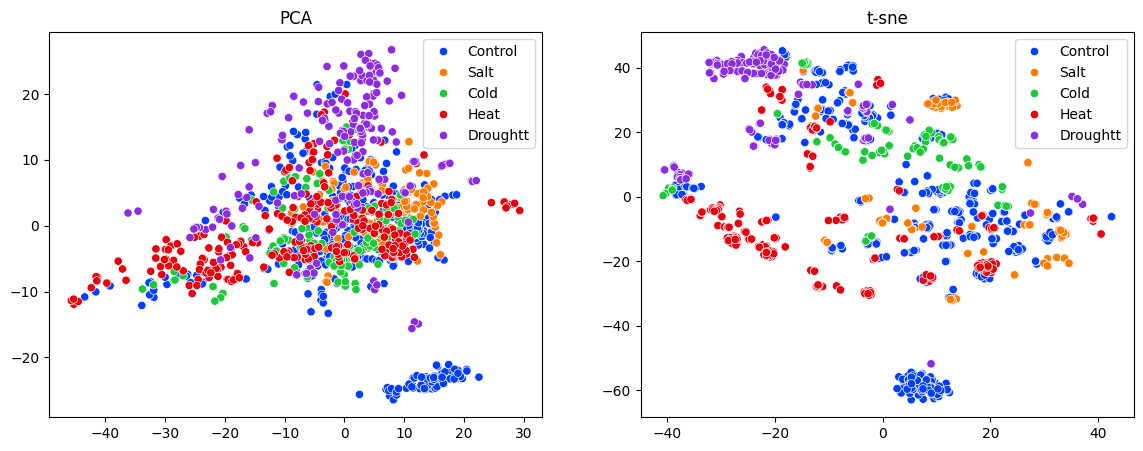

In [95]:
fig, axes=plt.subplots(1,2, figsize=(14,5))

sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=hue_data, legend="full", palette=pallette, ax=axes[0])
axes[0].set_title("PCA")
axes[0].grid(False)
sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1], hue=hue_data, legend="full", palette=pallette, ax=axes[1])
axes[1].set_title("t-sne")
axes[1].grid(False)
plt.show()

# <font color="yellow">Clustering with DEG results</font>

## <font color="orange">Check intersections of the DEGs</font>

In [96]:
def txt_to_list(txt_file):
    infile=open(txt_file,'r')
    infile_lines=infile.readlines()
    out_list=[line.strip() for line in infile_lines if line!=""]
    return out_list

In [97]:
cold_up_list=txt_to_list("Export/cold_DEG_up.txt")
heat_up_list=txt_to_list("Export/heat_DEG_up.txt")
drought_up_list=txt_to_list("Export/drought_DEG_up.txt")
salt_up_list=txt_to_list("Export/salt_DEG_up.txt")

cold_down_list=txt_to_list("Export/cold_DEG_down.txt")
heat_down_list=txt_to_list("Export/heat_DEG_down.txt")
drought_down_list=txt_to_list("Export/drought_DEG_down.txt")
salt_down_list=txt_to_list("Export/salt_DEG_down.txt")

all_unique_degs=cold_up_list+salt_up_list+heat_up_list+drought_up_list+cold_down_list+salt_down_list+heat_down_list+drought_down_list

all_unique_down_degs=cold_down_list+salt_down_list+heat_down_list+drought_down_list
all_unique_up_degs=cold_up_list+salt_up_list+heat_up_list+drought_up_list
len(all_unique_down_degs)

4992

## <font color="orange">Isolate TPMs for the unique DEG union</font>

In [98]:
all_TPM_ov1_deg_filtered=all_TPM_ov1_log2_df.filter(list(all_unique_degs), axis=0)


In [99]:
all_TPM_ov1_deg_filtered

,SRR19139704,SRR19139705,SRR19139706,SRR19139707,SRR19139708,SRR19139709,SRR19139710,SRR19139711,SRR19139712,SRR1915004,...,SRR2989703,SRR2989704,SRR2989713,SRR2989714,SRR2989715,SRR2989716,DRR118345,DRR118346,DRR149037,DRR149038
AT1G01250.1,0.297269,0.235580,0.148634,0.235580,0.148634,0.148634,0.345118,0.345118,0.345118,0.148634,...,0.297269,0.345118,0.514190,0.532849,0.565904,0.580698,0.445903,0.493753,0.384214,0.445903
AT1G01390.1,0.215338,0.000000,0.215338,0.341303,0.215338,0.215338,0.215338,0.341303,0.215338,0.000000,...,0.341303,0.341303,0.000000,0.000000,0.000000,0.000000,0.215338,0.215338,0.000000,0.000000
AT1G01420.1,0.479236,0.479236,0.441272,0.512122,0.479236,0.479236,0.512122,0.479236,0.479236,0.479236,...,0.590550,0.396370,0.590550,0.567077,0.590550,0.611979,0.441272,0.441272,0.000000,0.000000
AT1G01470.1,0.524089,0.532952,0.517764,0.552050,0.563421,0.575047,0.544627,0.559010,0.562697,0.591336,...,0.572418,0.555970,0.728936,0.731687,0.717928,0.725780,0.637192,0.640494,0.917579,0.915686
AT1G01500.1,0.606383,0.606383,0.536933,0.606383,0.590934,0.556417,0.606383,0.606383,0.590934,0.606383,...,0.711625,0.761591,0.814523,0.796109,0.808552,0.768934,0.729548,0.692142,0.776043,0.776043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT5G67400.1,0.481567,0.460293,0.460293,0.491282,0.500472,0.491282,0.448566,0.407575,0.481567,0.353447,...,0.235631,0.273559,0.407575,0.353447,0.407575,0.353447,0.000000,0.000000,0.000000,0.000000
ATCG00080.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.260432,...,0.371643,0.525174,0.394958,0.381526,0.328628,0.410786,0.312801,0.130216,0.000000,0.164314
ATCG00210.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.401406,0.000000,0.325139,0.000000,0.000000,0.000000,0.000000
ATCG00630.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.473689,...,0.412658,0.306108,0.438341,0.422702,0.392529,0.409998,0.312802,0.346175,0.330745,0.363878


## <font color="orange">PCA and t-SNE analysis with the unique DEG union</font>

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1243 samples in 0.008s...
[t-SNE] Computed neighbors for 1243 samples in 0.273s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1243
[t-SNE] Computed conditional probabilities for sample 1243 / 1243
[t-SNE] Mean sigma: 5.815450
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.673107
[t-SNE] KL divergence after 1000 iterations: 0.395814


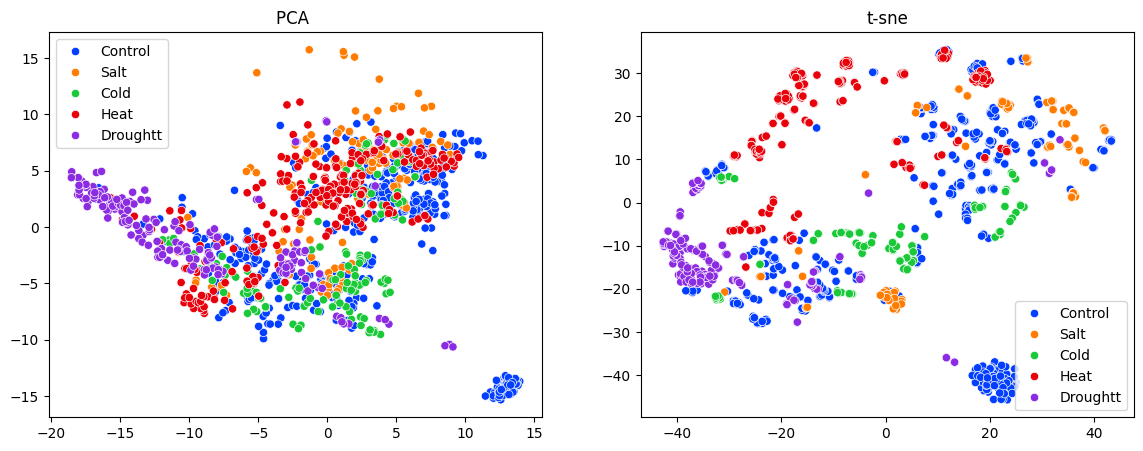

In [100]:
# all_TPM_ov1_deg_filtered_log2=np.log2(all_TPM_ov1_deg_filtered.values)

all_TPM_ov1_deg_filtered_log2=all_TPM_ov1_deg_filtered.values

import seaborn as sns
pallette=sns.color_palette("bright",8)
n_dim=100
random_seed=43

pca=PCA(n_components=n_dim, random_state=random_seed)
tsne=TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000, random_state=random_seed)

import warnings
warnings.filterwarnings(action='ignore')


pca_result=pca.fit_transform(all_TPM_ov1_deg_filtered_log2.T)
tsne_result=tsne.fit_transform(all_TPM_ov1_deg_filtered_log2.T)

fig, axes=plt.subplots(1,2, figsize=(14,5))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=hue_data, legend="full", palette=pallette, ax=axes[0])
axes[0].set_title("PCA ")
axes[0].grid(False)
sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1], hue=hue_data, legend="full", palette=pallette, ax=axes[1])
axes[1].set_title("t-sne")
axes[1].grid(False)
plt.show()

In [101]:
cold_up_list=txt_to_list("Export/cold_DEG_up_sub.txt")
heat_up_list=txt_to_list("Export/heat_DEG_up_sub.txt")
drought_up_list=txt_to_list("Export/drought_DEG_up_sub.txt")
salt_up_list=txt_to_list("Export/salt_DEG_up_sub.txt")

cold_down_list=txt_to_list("Export/cold_DEG_down_sub.txt")
heat_down_list=txt_to_list("Export/heat_DEG_down_sub.txt")
drought_down_list=txt_to_list("Export/drought_DEG_down_sub.txt")
salt_down_list=txt_to_list("Export/salt_DEG_down_sub.txt")

all_unique_degs=cold_up_list+salt_up_list+heat_up_list+drought_up_list+cold_down_list+salt_down_list+heat_down_list+drought_down_list

all_unique_down_degs=cold_down_list+salt_down_list+heat_down_list+drought_down_list
all_unique_up_degs=cold_up_list+salt_up_list+heat_up_list+drought_up_list

len(all_unique_degs)

320

In [102]:
all_TPM_ov1_deg_filtered=all_TPM_ov1_log2_df.filter(list(all_unique_degs), axis=0)
all_TPM_ov1_deg_filtered

,SRR19139704,SRR19139705,SRR19139706,SRR19139707,SRR19139708,SRR19139709,SRR19139710,SRR19139711,SRR19139712,SRR1915004,...,SRR2989703,SRR2989704,SRR2989713,SRR2989714,SRR2989715,SRR2989716,DRR118345,DRR118346,DRR149037,DRR149038
AT3G47820.1,0.508913,0.450704,0.450704,0.450704,0.415000,0.415000,0.415000,0.415000,0.450704,0.254456,...,0.508913,0.481632,0.450704,0.481632,0.481632,0.450704,0.575545,0.575545,0.481632,0.481632
AT1G06980.1,0.363237,0.247948,0.363237,0.439176,0.312876,0.363237,0.312876,0.404386,0.439176,0.156438,...,0.156438,0.247948,0.312876,0.363237,0.156438,0.312876,0.312876,0.312876,0.000000,0.000000
AT3G56290.1,0.659689,0.633397,0.642686,0.602768,0.612880,0.596081,0.502021,0.511964,0.470669,0.673329,...,0.553647,0.542318,0.542318,0.572414,0.553647,0.519009,0.470669,0.476882,0.488581,0.511964
AT5G15850.1,0.737297,0.741918,0.722571,0.677280,0.719105,0.672659,0.704436,0.710096,0.713761,0.635910,...,0.711939,0.704436,0.620420,0.613777,0.599597,0.613777,0.579891,0.595846,0.760526,0.760526
AT5G49480.1,0.725872,0.717622,0.715375,0.718955,0.754304,0.719837,0.708899,0.683211,0.690320,0.763150,...,0.565820,0.537918,0.501861,0.488325,0.488325,0.503700,0.527347,0.528903,0.606089,0.610672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT5G09480.1,0.695977,0.615270,0.563949,0.656034,0.586089,0.606010,0.677006,0.596298,0.624118,0.413911,...,0.632589,0.320358,0.563949,0.563949,0.575327,0.437356,0.000000,0.218678,0.218678,0.320358
AT4G33420.1,0.816956,0.805782,0.809576,0.777034,0.793956,0.777034,0.847204,0.830959,0.859324,0.668899,...,0.549606,0.520564,0.661240,0.653280,0.627336,0.627336,0.326640,0.363643,0.586609,0.586609
AT2G38380.1,0.542159,0.532839,0.546616,0.673713,0.671780,0.661727,0.698508,0.696863,0.701744,0.550947,...,0.621598,0.621598,0.618877,0.607483,0.632025,0.621598,0.337812,0.337812,0.444379,0.416348
AT1G75030.1,0.628405,0.512443,0.512443,0.396480,0.460299,0.396480,0.594720,0.628405,0.685797,0.314203,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.314203,0.396480,0.710682,0.733575


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1243 samples in 0.001s...
[t-SNE] Computed neighbors for 1243 samples in 0.164s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1243
[t-SNE] Computed conditional probabilities for sample 1243 / 1243
[t-SNE] Mean sigma: 1.353180
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.220516
[t-SNE] KL divergence after 1000 iterations: 0.383359


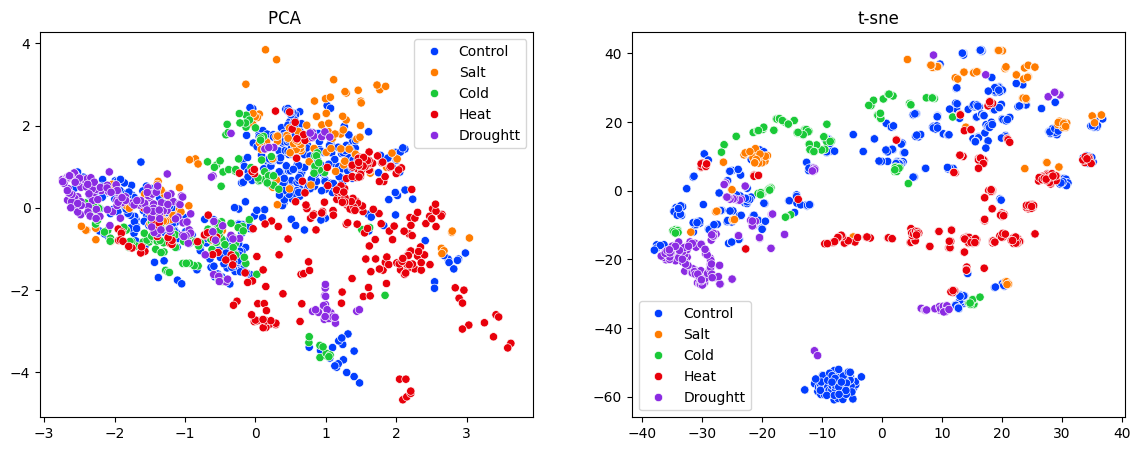

In [103]:
# all_TPM_ov1_deg_filtered_log2=np.log2(all_TPM_ov1_deg_filtered.values)

all_TPM_ov1_deg_filtered_log2=all_TPM_ov1_deg_filtered.values

import seaborn as sns
pallette=sns.color_palette("bright",8)
n_dim=100
random_seed=43

pca=PCA(n_components=n_dim, random_state=random_seed)
tsne=TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000, random_state=random_seed)

import warnings
warnings.filterwarnings(action='ignore')


pca_result=pca.fit_transform(all_TPM_ov1_deg_filtered_log2.T)
tsne_result=tsne.fit_transform(all_TPM_ov1_deg_filtered_log2.T)

fig, axes=plt.subplots(1,2, figsize=(14,5))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=hue_data, legend="full", palette=pallette, ax=axes[0])
axes[0].set_title("PCA ")
axes[0].grid(False)
sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1], hue=hue_data, legend="full", palette=pallette, ax=axes[1])
axes[1].set_title("t-sne")
axes[1].grid(False)
plt.show()

In [117]:
cold_down_sub_df=all_TPM_ov1_log2_df.filter(cold_down_list, axis=0)
heat_down_sub_df=all_TPM_ov1_log2_df.filter(heat_down_list, axis=0)
drought_down_sub_df=all_TPM_ov1_log2_df.filter(drought_down_list, axis=0)
salt_down_sub_df=all_TPM_ov1_log2_df.filter(salt_down_list, axis=0)

In [118]:
salt_con_ID_list=salt_control_TPM.columns.values.tolist()
salt_sam_ID_list=salt_sample_TPM.columns.values.tolist()
cold_con_ID_list=cold_control_TPM.columns.values.tolist()
cold_sam_ID_list=cold_sample_TPM.columns.values.tolist()

heat_con_ID_list=heat_control_TPM.columns.values.tolist()
heat_sam_ID_list=heat_sample_TPM.columns.values.tolist()
drought_con_ID_list=drought_control_TPM.columns.values.tolist()
drought_sam_ID_list=drought_sample_TPM.columns.values.tolist()

In [119]:
group_names=['Control', 'Salt', 'Cold', 'Heat','Drought']
control_ids=salt_con_ID_list+cold_con_ID_list+heat_con_ID_list+drought_con_ID_list


In [120]:
con_dic={id:"Control" for id in control_ids}
salt_dic={id:"Salt" for id in salt_sam_ID_list}
cold_dic={id:"Cold" for id in cold_sam_ID_list}
heat_dic={id:"Heat" for id in heat_sam_ID_list}
drought_dic={id:"Drought" for id in drought_sam_ID_list}



In [121]:
con_dic.update(salt_dic)
con_dic.update(cold_dic)
con_dic.update(heat_dic)
con_dic.update(drought_dic)

col_groups=pd.Series(con_dic)
col_groups

SRR19139704    Control
SRR19139705    Control
SRR19139706    Control
SRR19139707    Control
SRR19139708    Control
                ...   
SRR2989716     Drought
DRR118345      Drought
DRR118346      Drought
DRR149037      Drought
DRR149038      Drought
Length: 1238, dtype: object

In [122]:
salt_deg_genes=salt_down_sub_df.index.values.tolist()
cold_deg_genes=cold_down_sub_df.index.values.tolist()
heat_deg_genes=heat_down_sub_df.index.values.tolist()
drought_deg_genes=drought_down_sub_df.index.values.tolist()

sorted_gene_ids=salt_deg_genes+cold_deg_genes+heat_deg_genes+drought_deg_genes

salt_deg_dic={id:"Salt" for id in salt_deg_genes}
cold_deg_dic={id:"Cold" for id in cold_deg_genes}
heat_deg_dic={id:"Heat" for id in heat_deg_genes}
drought_deg_dic={id:"Drought" for id in drought_deg_genes}

salt_deg_dic.update(cold_deg_dic)
salt_deg_dic.update(heat_deg_dic)
salt_deg_dic.update(drought_deg_dic)

row_groups=pd.Series(salt_deg_dic)
row_groups

ATCG00340.1       Salt
ATCG00900.1       Salt
AT3G47836.1       Salt
ATMG00660.1       Salt
ATCG01240.1       Salt
                ...   
AT5G09480.1    Drought
AT4G33420.1    Drought
AT2G38380.1    Drought
AT1G75030.1    Drought
AT4G25315.1    Drought
Length: 160, dtype: object

In [123]:
all_sample_ids=control_ids+salt_sam_ID_list+cold_sam_ID_list+heat_sam_ID_list+drought_sam_ID_list
sorted_all_sample_df=all_TPM_ov1_deg_filtered[all_sample_ids]
sorted_all_sample_df=sorted_all_sample_df.filter(sorted_gene_ids, axis=0)
sorted_all_sample_df

,SRR19139704,SRR19139705,SRR19139706,SRR19139707,SRR19139708,SRR19139709,SRR19139710,SRR19139711,SRR19139712,SRR1915004,...,SRR2989703,SRR2989704,SRR2989713,SRR2989714,SRR2989715,SRR2989716,DRR118345,DRR118346,DRR149037,DRR149038
ATCG00340.1,0.175034,0.157223,0.190093,0.107322,0.135425,0.175034,0.310459,0.270850,0.257805,0.287637,...,0.374014,0.367426,0.335461,0.335461,0.332257,0.332257,0.175034,0.107322,0.135425,0.190093
ATCG00900.1,0.172792,0.086396,0.136935,0.136935,0.136935,0.172792,0.242545,0.136935,0.172792,0.172792,...,0.390818,0.379479,0.385278,0.379479,0.373398,0.367004,0.086396,0.086396,0.136935,0.136935
AT3G47836.1,0.295259,0.395143,0.342666,0.409481,0.342666,0.422671,0.379437,0.362075,0.181037,0.647915,...,0.623587,0.607881,0.637925,0.677420,0.671927,0.623587,0.690402,0.677420,0.677420,0.657334
ATMG00660.1,0.000000,0.000000,0.000000,0.000000,0.098245,0.000000,0.000000,0.098245,0.000000,0.098245,...,0.228117,0.155714,0.311428,0.294734,0.228117,0.326362,0.000000,0.000000,0.000000,0.155714
ATCG01240.1,0.172792,0.086396,0.136935,0.136935,0.136935,0.172792,0.242545,0.136935,0.172792,0.172792,...,0.390818,0.379479,0.385278,0.379479,0.373398,0.367004,0.086396,0.086396,0.136935,0.136935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT5G09480.1,0.695977,0.615270,0.563949,0.656034,0.586089,0.606010,0.677006,0.596298,0.624118,0.413911,...,0.632589,0.320358,0.563949,0.563949,0.575327,0.437356,0.000000,0.218678,0.218678,0.320358
AT4G33420.1,0.816956,0.805782,0.809576,0.777034,0.793956,0.777034,0.847204,0.830959,0.859324,0.668899,...,0.549606,0.520564,0.661240,0.653280,0.627336,0.627336,0.326640,0.363643,0.586609,0.586609
AT2G38380.1,0.542159,0.532839,0.546616,0.673713,0.671780,0.661727,0.698508,0.696863,0.701744,0.550947,...,0.621598,0.621598,0.618877,0.607483,0.632025,0.621598,0.337812,0.337812,0.444379,0.416348
AT1G75030.1,0.628405,0.512443,0.512443,0.396480,0.460299,0.396480,0.594720,0.628405,0.685797,0.314203,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.314203,0.396480,0.710682,0.733575


In [124]:
col_groups

SRR19139704    Control
SRR19139705    Control
SRR19139706    Control
SRR19139707    Control
SRR19139708    Control
                ...   
SRR2989716     Drought
DRR118345      Drought
DRR118346      Drought
DRR149037      Drought
DRR149038      Drought
Length: 1238, dtype: object

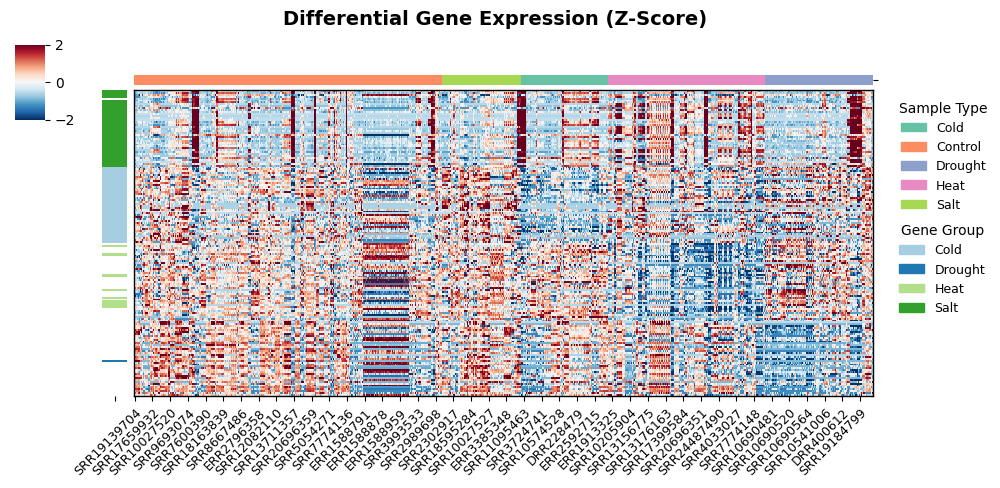

In [129]:
# ordered_samples = col_groups.sort_values().index.tolist()
# # Reorder rows by gene groups
# ordered_genes = row_groups.sort_values().index.tolist()



# unique_sample_types = col_groups.unique()
# sample_palette = dict(zip(unique_sample_types, sns.color_palette("Set2", n_colors=len(unique_sample_types))))
# # Get the colors for the ordered sample columns
# col_colors = col_groups[ordered_samples].map(sample_palette)

# # For gene groups (rows)
# unique_gene_groups = row_groups.unique()
# gene_palette = dict(zip(unique_gene_groups, sns.color_palette("Set1", n_colors=len(unique_gene_groups))))
# # Get the colors for the ordered gene rows
# row_colors = row_groups[ordered_genes].map(gene_palette)

# # -------------------------------------------
# # 5. Plot the Heatmap using Seaborn Clustermap
# # -------------------------------------------
# g = sns.clustermap(sorted_all_sample_df,
#                    row_colors=row_colors,    # Annotations for gene groups
#                    col_colors=col_colors,    # Annotations for sample types
#                    cmap='bwr',              # Diverging colormap for expression values
#                    figsize=(12, 6),
#                    row_cluster=False,        # Set to False to preserve our ordering
#                    col_cluster=False)

# # Customize the plot appearance
# plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45, ha='right')
# g.ax_heatmap.set_title("Gene Expression Heatmap for Down-Regulated Markers\n\n")
# plt.show()



import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# ... (Keep your existing color palette setup code here) ...

# -------------------------------------------
# Plot the Heatmap
# -------------------------------------------
# 'z_score=0' normalizes by ROW (Gene).
# This sets the mean of every gene to 0. 
# Expression below mean becomes Negative (Blue), above mean becomes Positive (Red).

g = sns.clustermap(sorted_all_sample_df,
                   row_colors=row_colors,
                   col_colors=col_colors,
                   
                   # --- KEY FIXES BELOW ---
                   z_score=0,            # Normalizes each gene to Mean=0, Std=1
                   cmap='RdBu_r',        # Blue (low) -> White -> Red (high)
                   center=0,             # Ensures White is exactly at the mean
                   vmin=-2, vmax=2,      # Clips outliers so colors are distinct (adjust range if needed)
                   # -----------------------
                   
                   figsize=(10, 5),
                   row_cluster=False,
                   col_cluster=False,
                   dendrogram_ratio=(0.1, 0.1),
                   cbar_pos=(0.02, 0.8, 0.03, 0.15)) # Legend position

# --- Formatting ---
g.ax_heatmap.set_xlabel('')
g.ax_heatmap.set_ylabel('')

# Rotate x-axis labels
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), 
                             rotation=45, ha='right', fontsize=9, rotation_mode='anchor')

# Clean up y-axis (hide if too many genes)
if len(ordered_genes) > 50:
    g.ax_heatmap.set_yticks([])
else:
    g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), fontsize=8)

# Add border
for _, spine in g.ax_heatmap.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# --- Add Legends (Same as before) ---
sample_patches = [mpatches.Patch(color=color, label=label) for label, color in sample_palette.items()]
gene_patches = [mpatches.Patch(color=color, label=label) for label, color in gene_palette.items()]

l1 = g.ax_heatmap.legend(handles=sample_patches, loc='upper left', 
                         bbox_to_anchor=(1.02, 1), title="Sample Type", 
                         frameon=False, title_fontsize=10, fontsize=9)

g.ax_heatmap.add_artist(l1) 
g.ax_heatmap.legend(handles=gene_patches, loc='upper left', 
                    bbox_to_anchor=(1.02, 0.6), title="Gene Group", 
                    frameon=False, title_fontsize=10, fontsize=9)

g.fig.suptitle("Differential Gene Expression (Z-Score)", y=1.02, fontsize=14, weight='bold')

plt.show()

In [130]:
cold_up_sub_df=all_TPM_ov1_log2_df.filter(cold_up_list, axis=0)
heat_up_sub_df=all_TPM_ov1_log2_df.filter(heat_up_list, axis=0)
drought_up_sub_df=all_TPM_ov1_log2_df.filter(drought_up_list, axis=0)
salt_up_sub_df=all_TPM_ov1_log2_df.filter(salt_up_list, axis=0)

salt_con_ID_list=salt_control_TPM.columns.values.tolist()
salt_sam_ID_list=salt_sample_TPM.columns.values.tolist()
cold_con_ID_list=cold_control_TPM.columns.values.tolist()
cold_sam_ID_list=cold_sample_TPM.columns.values.tolist()

heat_con_ID_list=heat_control_TPM.columns.values.tolist()
heat_sam_ID_list=heat_sample_TPM.columns.values.tolist()
drought_con_ID_list=drought_control_TPM.columns.values.tolist()
drought_sam_ID_list=drought_sample_TPM.columns.values.tolist()

group_names=['Control', 'Salt', 'Cold', 'Heat','Drought']
control_ids=salt_con_ID_list+cold_con_ID_list+heat_con_ID_list+drought_con_ID_list

con_dic={id:"Control" for id in control_ids}
salt_dic={id:"Salt" for id in salt_sam_ID_list}
cold_dic={id:"Cold" for id in cold_sam_ID_list}
heat_dic={id:"Heat" for id in heat_sam_ID_list}
drought_dic={id:"Drought" for id in drought_sam_ID_list}


con_dic.update(salt_dic)
con_dic.update(cold_dic)
con_dic.update(heat_dic)
con_dic.update(drought_dic)

col_groups=pd.Series(con_dic)


salt_deg_genes=salt_up_sub_df.index.values.tolist()
cold_deg_genes=cold_up_sub_df.index.values.tolist()
heat_deg_genes=heat_up_sub_df.index.values.tolist()
drought_deg_genes=drought_up_sub_df.index.values.tolist()

sorted_gene_ids=salt_deg_genes+cold_deg_genes+heat_deg_genes+drought_deg_genes

salt_deg_dic={id:"Salt" for id in salt_deg_genes}
cold_deg_dic={id:"Cold" for id in cold_deg_genes}
heat_deg_dic={id:"Heat" for id in heat_deg_genes}
drought_deg_dic={id:"Drought" for id in drought_deg_genes}

salt_deg_dic.update(cold_deg_dic)
salt_deg_dic.update(heat_deg_dic)
salt_deg_dic.update(drought_deg_dic)

row_groups=pd.Series(salt_deg_dic)
row_groups


all_sample_ids=control_ids+salt_sam_ID_list+cold_sam_ID_list+heat_sam_ID_list+drought_sam_ID_list
sorted_all_sample_df=all_TPM_ov1_deg_filtered[all_sample_ids]
sorted_all_sample_df=sorted_all_sample_df.filter(sorted_gene_ids, axis=0)



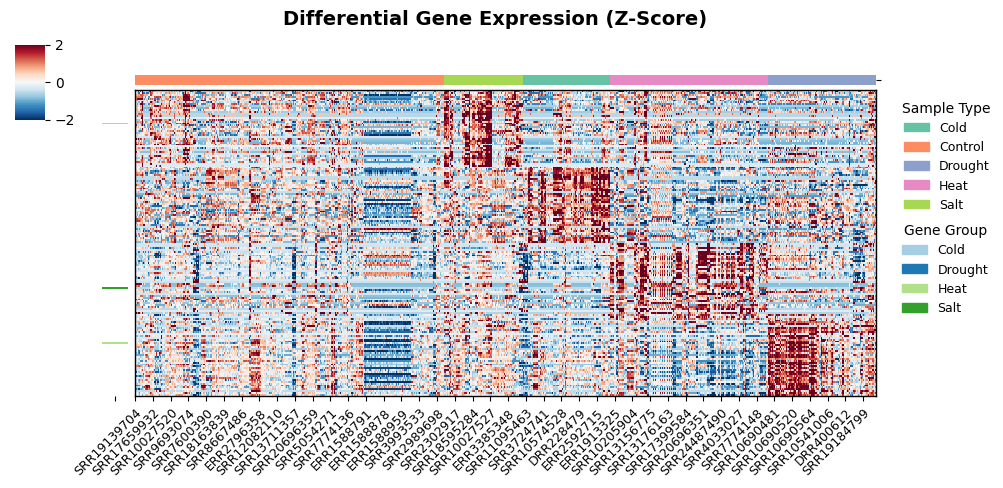

In [131]:


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# ... (Keep your existing color palette setup code here) ...

# -------------------------------------------
# Plot the Heatmap
# -------------------------------------------
# 'z_score=0' normalizes by ROW (Gene).
# This sets the mean of every gene to 0. 
# Expression below mean becomes Negative (Blue), above mean becomes Positive (Red).

g = sns.clustermap(sorted_all_sample_df,
                   row_colors=row_colors,
                   col_colors=col_colors,
                   
                   # --- KEY FIXES BELOW ---
                   z_score=0,            # Normalizes each gene to Mean=0, Std=1
                   cmap='RdBu_r',        # Blue (low) -> White -> Red (high)
                   center=0,             # Ensures White is exactly at the mean
                   vmin=-2, vmax=2,      # Clips outliers so colors are distinct (adjust range if needed)
                   # -----------------------
                   
                   figsize=(10, 5),
                   row_cluster=False,
                   col_cluster=False,
                   dendrogram_ratio=(0.1, 0.1),
                   cbar_pos=(0.02, 0.8, 0.03, 0.15)) # Legend position

# --- Formatting ---
g.ax_heatmap.set_xlabel('')
g.ax_heatmap.set_ylabel('')

# Rotate x-axis labels
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), 
                             rotation=45, ha='right', fontsize=9, rotation_mode='anchor')

# Clean up y-axis (hide if too many genes)
if len(ordered_genes) > 50:
    g.ax_heatmap.set_yticks([])
else:
    g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), fontsize=8)

# Add border
for _, spine in g.ax_heatmap.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# --- Add Legends (Same as before) ---
sample_patches = [mpatches.Patch(color=color, label=label) for label, color in sample_palette.items()]
gene_patches = [mpatches.Patch(color=color, label=label) for label, color in gene_palette.items()]

l1 = g.ax_heatmap.legend(handles=sample_patches, loc='upper left', 
                         bbox_to_anchor=(1.02, 1), title="Sample Type", 
                         frameon=False, title_fontsize=10, fontsize=9)

g.ax_heatmap.add_artist(l1) 
g.ax_heatmap.legend(handles=gene_patches, loc='upper left', 
                    bbox_to_anchor=(1.02, 0.6), title="Gene Group", 
                    frameon=False, title_fontsize=10, fontsize=9)

g.fig.suptitle("Differential Gene Expression (Z-Score)", y=1.02, fontsize=14, weight='bold')

plt.show()